<font size=4 color='blue'>

# <center> Clase 5, octubre 21 del 2020 </center>

<font size=4 color='blue'>

# <center> Tópico de estudio: Mortalidad por diabetes </center>

<font size=4 color='blue'>
    
## Información sobre el tópico

<font size=4>

Evolución de la diabetes después de un año.
    
En el presente trabajo, la diabetes la caracterizamos con los siguientes diez rasgos: edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones de suero sanguíneo (S1, S2, S3, S4, S5, S6).


<font size=4 color='blue'>
    
## Cuantificación de esta información

<font size=4>

Se tiene información de 442 pacientes $(m = 442)$. La respuesta de interés, $Y$, es una medida cuantitativa de la progresión de la enfermedad un año después del inicio del estudio. Los valores de $Y$ varían entre 25 y 346

Fuente de la información: [diabetes data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)    

Artículo original: [Least-Angle-Regression_2004](./Literatura/Least-Angle-Regression_2004.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Los datos se encuentran el el archivo diabetes.csv

df = pd.read_csv('diabetes.csv', sep ='\t')

# se crea el dataframe df, el cual contiene los 10 rasgos relevantes de los pacientes
# diabeticos, así como el progreso (y) de la enfermedad un año después de comenzado el estudio. 

In [3]:
# Se despliegan las primeras 5 muestras (rasgos, objetivo)

df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


<font size=4 color='cornflowerblue'>
    
  ## Ejercicio

<font size=4>
    
  Despliega los últimos 15 renglones del dataframe *df*.

In [ ]:
# Escribe el código aquí


In [4]:
# el método describe() genera una tabla con informacion estadística de cada uno de los rasgos y del objetivo.

df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


## Se crean los histogramas para cada uno de los rasgos que caracteriza a los pacientes con diabetes:

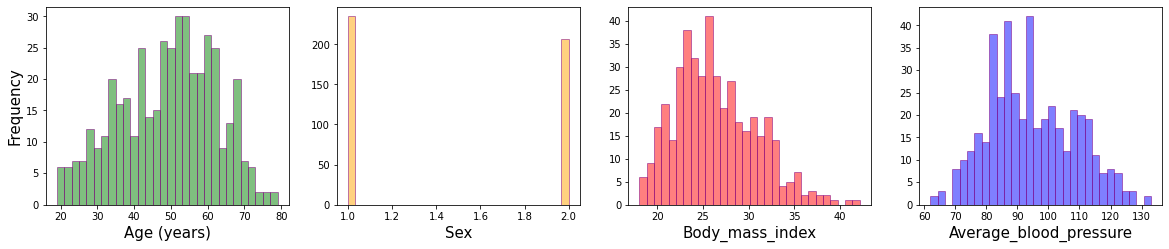

In [5]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Age (years)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Sex', size=15)

ax3.hist(df.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Body_mass_index', size=15)

ax4.hist(df.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Average_blood_pressure', size=15);

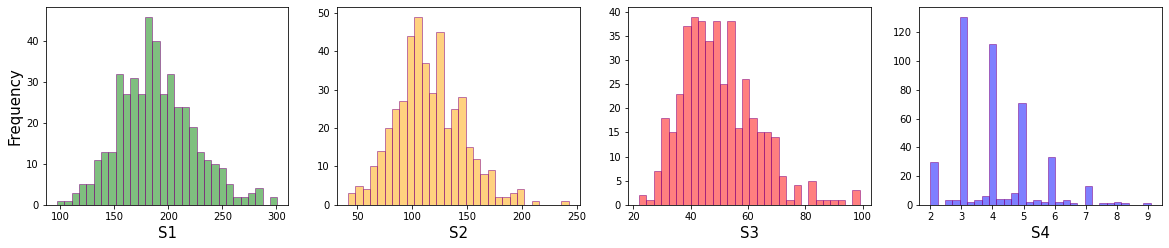

In [6]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('S1', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('S2', size=15)

ax3.hist(df.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('S3', size=15)

ax4.hist(df.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('S4', size=15);

Text(0.5, 0, 'Y')

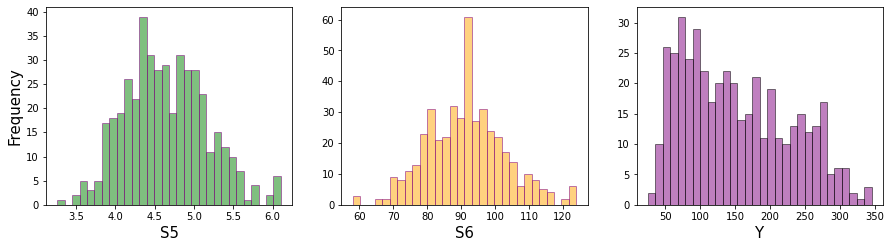

In [7]:
plt.figure(figsize=(15,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('S5', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('S6', size=15)

ax3.hist(df.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y', size=15)


<font size=4>

Para quitar cualquier posible correlación entre las muestras (los renglones del DataFrame), estos se reordenan al azar.

In [8]:
df = df.sample(frac=1)

<font size=4 color='cornflowerblue'>
    
  ## Ejercicio

<font size=4>
    
  Despliega los últimos 15 renglones del dataframe *df*.

<font size=4>
    
Se dividen la muestras originales en 2 conjuntos: 90 % para el entrenamiento y 10 % para hacer inferencias (predicciones) con lo aprendido.

In [9]:
test_ratio = 0.1

train_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

df_train = df.iloc[0:train_ratio,:]
df_test  = df.iloc[train_ratio:,:]

In [10]:
print(df_train.shape)
print(df_test.shape)

(397, 11)
(45, 11)


<font size=4>

Para trabajar con los modelos se requiere que todas las variables tengan el mismo orden de magnitud. Por ello, se normalizan sus valores en las muestras que se van a emplear en el entrenamiento, tanto los rasgos $(X)$ como la variable objetivo o referencia $(Y)$:

$$x_{norm} = \dfrac{x-\bar{x}}{\sigma}$$

In [11]:
df_train_norm = (df_train - df_train.mean()) / df_train.std()

In [12]:
df_test_norm = (df_test - df_train.mean()) / df_train.std()

<font size=4>
    
Histogramas de las variables que se emplearán en el entrenamiento:

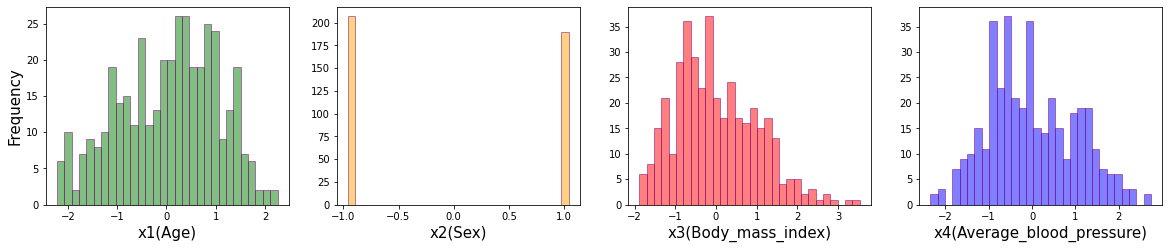

In [13]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x1(Age)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x2(Sex)', size=15)

ax3.hist(df_train_norm.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x3(Body_mass_index)', size=15)

ax4.hist(df_train_norm.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x4(Average_blood_pressure)', size=15);

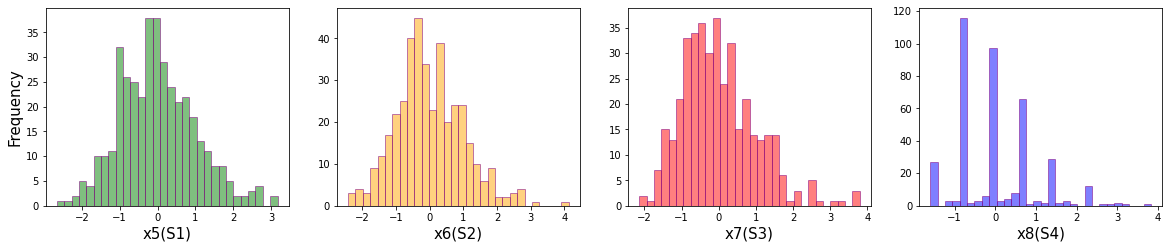

In [14]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x5(S1)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x6(S2)', size=15)

ax3.hist(df_train_norm.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x7(S3)', size=15)

ax4.hist(df_train_norm.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x8(S4)', size=15);

Text(0.5, 0, 'Y')

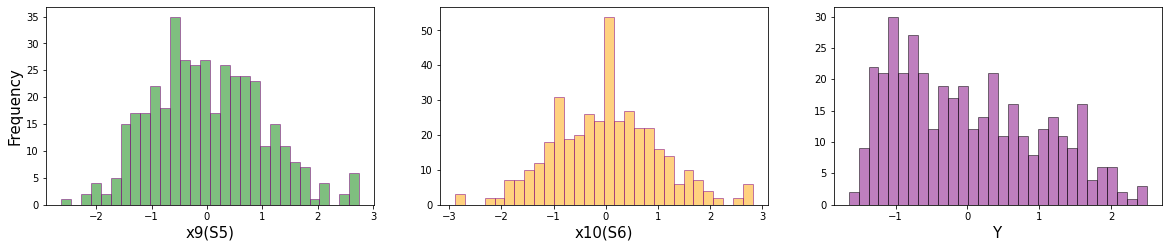

In [15]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df_train_norm.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x9(S5)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x10(S6)', size=15)

ax3.hist(df_train_norm.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y', size=15)


<font size=4>
Los valores de las variables X e Y se extraen de las columnas del DataFrame.

In [16]:
train_x = df_train_norm.values[:,:-1]
train_y = df_train_norm.values[:,-1:]

In [17]:
test_x = df_test_norm.values[:,:-1]
test_y = df_test_norm.values[:,-1:]

In [18]:
x_train = train_x.T
x_test = test_x.T

y_train = train_y.T
y_test = test_y.T

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10, 397)
(1, 397)
(10, 45)
(1, 45)


In [19]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(397, 10)
(397, 1)
(45, 10)
(45, 1)


<font size=5 color='blue'>

# <center> Artificial Neural Networks </center>




<font size=4 color='blue'>

# <center> Implementación empleando el lenguaje formal Python </center>

<font size=4>

Inspirándose en modelos que intentan describir las conexiones entre las neuronas en nuestro cerebro, se propusieron (y se siguen proponiendo) modelos de redes neuronales para generar sistemas de aprendizaje. Se les conoce con el nombre de redes neuronales artificiales, o simplemente como **redes neuronales**.


<img src='images\neurons.png'>

<font size=5 color='blue'>
Implementación de una red neuronal del tipo "Full Feed-forward (FFF)".

<font size=4>

En nuestro primer modelo, la red neuronal tiene 3 capas: la **capa de entrada**, la **capa de salida** y una capa interior (en la literatura, a esta capa interna se le da el nombre de **capa oculta**). 
    
    
    
<p>El objetivo del modelo es encontrar una función que describa la evolución de la diabetes con los rasgos de la persona que se consideran importantes para su evolución. Los rasgos propuestos son: edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones de suero sanguíneo.</p>
<p>Esta función se genera mediante una red de neuronas artificiales. Se entiende como neurona un modelo matemático simple de una neurona biológica.</p>
</font>

<font size=5 color='blue'>

Adecuando los datos de alimentación al sistema de aprendizaje

<font size=4>
    
###  Definición de la arquitectura de la red neuronal.

*El número de nodos en la capa de entrada depende del numero de rasgos del sistema que definen la variable objetivo*, la evolución de la diabetes. En el presente caso el número de rasgos es diez.

*El número de nodos en la capa de salida depende del tipo de problema*. En el presente caso, se tiene una sola neurona, cuya salida nos da un número que cuantifica la evolución de la diabetes.

En el presente modelo, sólo tenemos una capa interna, el número de nodos en ella es variable. Se hacen pruebas con diferentes números y se adopta el valor que da mejores resultados.

La función ```layer_sizes()``` genera la arquitectura de la red neuronal partiendo de los datos con que se van a alimentar a la red.


In [21]:
def layer_sizes(X, Y, n_h):
    """
    Argument:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Return:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0]     
    n_h = n_h
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [24]:
n_h = 4
n_x, n_h, n_y = layer_sizes(x_train, y_train, n_h = n_h)

In [25]:
print(n_x, n_h, n_y)

10 4 1


<font size=5 color='blue'>
Gráfica de la red     
 
<font size=4 color='black'> 
    
Usaremos NetworkX, que es una librería escrita en Python para la creación, manipulación y estudio de la estructura, dinámica y funciones de redes complejas.
    
[NetworkX](https://networkx.github.io/)

Para instalar NetworkX puedes usar el siguiente comando:

In [26]:
import networkx as nx

class Network(object):
    
    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """        
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample
    
    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()    
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))
        nx.draw(Q, pos = ps)
                

It has 3 layers,
with the following number of nodes per layer [10, 4, 1]


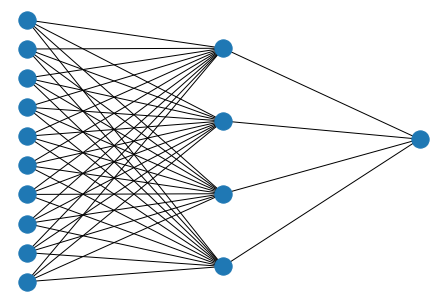

In [27]:
layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
 1. Inicialización de los pesos y el bias.

    
### Se inicializan las variables del algoritmo que define la relación entre X y Y. 

<font size=4>
Debido a que las variables X y Y fueron normalizadas a distribuciones con un deviación estándar, las variables $w$ se inicializan con valores pequeños, mientras que los biases se inicializan a cero.

<font size=4>

La función ```initialize_parameters()``` inicializa a los pesos $W$ y el bias $b$. 

Dado que se tiene un conjunto de variables independientes, se debe definir un peso para cada variable, esto para una sola neurona de la siguiente capa. 

Entonces $W_1$ ahora es una matriz de tamaño $(n_h, n_x)$, en donde $n_h$ es el número de nodos en la capa interna y $n_x$ es el número de nodos en la capa de entrada, es decir, es el número de variables independientes.

Por cada neurona en la capa interna hay un bias, por lo que ahora $b_1$ es un vector de tamaño $(n_h, 1)$. 

En general para cada par de capas consecutivas debe haber un $W$ y un $b$.

Generalizando:

$W_i$ y $b_i$ son los parámetros a definir entre la capa $i$ y la capa $i+1$. Si la capa $i$ tiene $n_i$ neuronas y la capa $i+1$ tiene $n_{i+1}$ neuronas entonces, las dimensiones de $W_i$ son $(n_{i+1}, n_i)$ y las dimensiones de $b_i$ son $(n_{i+1}, 1)$.

In [28]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- int: size of the input layer
    n_h -- int: size of the hidden layer
    n_y -- int: size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) 
    
    W1 = np.reshape(np.random.uniform(-0.1, 0.1, n_h*n_x), (n_h, n_x))  
    b1 = np.zeros((n_h, 1))
    W2 = np.reshape(np.random.uniform(-0.1, 0.1, n_y*n_h), (n_y, n_h))    
    b2 = np.zeros((n_y, 1))
     
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [29]:
parameters = initialize_parameters(n_x, n_h, n_y)

In [30]:
W1 = parameters['W1']
W2 = parameters['W2']
b1 = parameters['b1']
b2 = parameters['b2']

In [32]:
b2

array([[0.]])

<font size=5 color='blue'>

2. Conexión entre las neuronas de capas contiguas.

<font size=4>

La función ```propagate()``` realiza la combinacion lineal entre los valores de salida de los nodos de una capa con los pesos y bias definidos entre esa capa y la siguiente. 

La función de activación que se aplica a esta combinación, es para considerar efectos no lineales.


___

Funciones de activación disponibles en la presente notebook: 

In [33]:
#Función para considerar los efectos no lineales.
#En el presente caso se considera un modelo completamente lineal.
#Por ello la función es la identidad.

def identity(z):
    """
    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- z
    """
    s = np.multiply(1.0,z)
    
    return s

In [34]:
def identity_derivative(z):
    return np.ones(len(z))

In [35]:
def tanh(z):
    """
    Compute the tanh of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- tanh(z)
    """
    return np.tanh(z)

In [36]:
def tanh_derivative(z):
    return 1-np.square(tanh(z))

In [37]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-z))
    
    return s

In [38]:
def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

In [43]:
def propagate(X, Y, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Zi es la combinación lineal entre x y w
    # Ai es la aplicación de una función de activación a Zi
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    m = Y.shape[1] # number of samples

    cost = (1/m)*np.sum((Y-A2)**2)
    cost = np.squeeze(cost)     
    
    assert(isinstance(cost, float))

    # Calculo de derivadas
        
    dZ2 = 2*(A2-Y)
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2)*tanh_derivative(A1)
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    
    return A2, cache, cost, grads

In [44]:
def validation(X, Y, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    Y -- output data of size (n_y, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    cost -- the value of cost
    grads -- a dictionary contains derivatives to update parameters
    """
    # Regresa cada parametro del diccionario "parameters"
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Pasos 1 y 2:
    
    # Zi es la combinacion lineal entre x y w
    # Ai es la aplicacion de una funcion de activacion a Zi:
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    
    # se verifican las dimensiones de A2:
    
    assert(A2.shape == (1, X.shape[1]))

    # Paso 3:
    
    # numero de muestras:
    
    m = Y.shape[1] 
    
    # se calcula el costo:

    cost = (1/m)*np.sum((Y-A2)**2)
    
    # Asegura que cost sea un escalar:
    
    cost = np.squeeze(cost)      
                                
    assert(isinstance(cost, float))  
    
    return cost

<font size=5 color='blue'>

3. Cálculo de la función de costo durante la optimización de los parámetros que definen al modelo.

<font size=4>

Recordemos que la función de costo, $J$, nos permite saber qué tan bien se esta ajustando el modelo a la variable objetivo de las muestras. 

Para ello se buscan los parámetros que minimicen a esta función. 

En el presente caso, la función de costo está definida por la relación siguiente: 

$$J = \dfrac{1}{m}\sum_{i=1}^{m}(y_i-a_i)^2$$

In [45]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of samples
    cost = (1/m)*np.sum((Y-A2)**2) 
    cost = np.squeeze(cost)    
    assert(isinstance(cost, float))
    
    return cost

<font size=4>

Para encontrar a los valores óptimos de los parámetros, estos se acualizan en cada época empleando el algoritmo de gradiente descendente. El cual esta definido por la siguientes relaciones:

$$ \omega := \omega - \alpha \dfrac{\partial J(\omega, b)}{\partial \omega}$$

$$ b := b - \alpha \dfrac{\partial J(\omega, b)}{\partial b}$$

Por ello es necesario calcular las derivadas del costo respecto a cada uno de los parámetros.

In [46]:
def calculation_of_derivatives(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Calculo de derivadas
    
    dZ2 = 2*(A2-Y)
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

<font size=5 color='blue'>
4. Optimizacion de los pesos y los bias.

In [47]:
def optimize(parameters, grads, learning_rate = 0.1):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

<font size=5 color='blue'>
5. Las predicciones se realizan con los parametros óptimos encontrados en el entrenamiento.

In [48]:
def predict(parameters, X, Y):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model
    """
    predictions =  []
    A2, cache, cost, grads = propagate(X, Y, parameters)
    predictions = identity(A2) 
    
    return predictions

<font size=5 color='blue'>
    
Las funciones anteriores se integran para generar, entrenar y validar la red neuronal.

In [49]:
def nn_model(X, Y, val_ratio, n_h, epochs, alpha, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    train_ratio = int((1-val_ratio)*X.shape[1])
    X_dev = X[:,train_ratio:]
    Y_dev = Y[:,train_ratio:]

    X = X[:,:train_ratio]
    Y = Y[:,:train_ratio]
    
    print("Train",X.shape,Y.shape)
    print("val",X_dev.shape,Y_dev.shape)
    
    np.random.seed(3)
    
    n_x, n_h, n_y = layer_sizes(X, Y, n_h = n_h)
        
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"] 
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    
    costs=[]
    costs_dev = []
    params = []
    
    for i in range(0, epochs):
         
        A2, cache, cost, grads = propagate(X, Y, parameters)
    
        cost_dev = validation(X_dev, Y_dev, parameters)
 
        parameters = optimize(parameters, grads, alpha)
        
        params.append(parameters)
        
        costs.append(cost)
        
        costs_dev.append(cost_dev)
                
        # Print the cost every 1000 iterations
        if print_cost and i % 100 == 0:
            print ("Cost and Cost_val in epoch %i: %f %f" %(i, cost, cost_dev))
            
    return parameters, costs, params, costs_dev

<font size=5 color='blue'>

Entrenamiento:

In [50]:
epochs = 2000
learning_rate = 0.008
val_ratio = 0.1
n_h = 4

opt_parameters, costs, params, costs_dev = nn_model(x_train, y_train, val_ratio=val_ratio, 
                                                    n_h = n_h, epochs = epochs, alpha=learning_rate, print_cost=True)


Train (10, 357) (1, 357)
val (10, 40) (1, 40)
Cost and Cost_val in epoch 0: 0.991447 1.251197
Cost and Cost_val in epoch 100: 0.794791 1.062122
Cost and Cost_val in epoch 200: 0.536448 0.784576
Cost and Cost_val in epoch 300: 0.484938 0.719947
Cost and Cost_val in epoch 400: 0.470794 0.692429
Cost and Cost_val in epoch 500: 0.467277 0.681367
Cost and Cost_val in epoch 600: 0.466083 0.676379
Cost and Cost_val in epoch 700: 0.465410 0.673793
Cost and Cost_val in epoch 800: 0.464910 0.672315
Cost and Cost_val in epoch 900: 0.464490 0.671386
Cost and Cost_val in epoch 1000: 0.464117 0.670738
Cost and Cost_val in epoch 1100: 0.463772 0.670240
Cost and Cost_val in epoch 1200: 0.463448 0.669823
Cost and Cost_val in epoch 1300: 0.463137 0.669452
Cost and Cost_val in epoch 1400: 0.462836 0.669107
Cost and Cost_val in epoch 1500: 0.462545 0.668777
Cost and Cost_val in epoch 1600: 0.462260 0.668456
Cost and Cost_val in epoch 1700: 0.461982 0.668139
Cost and Cost_val in epoch 1800: 0.461709 0.6678

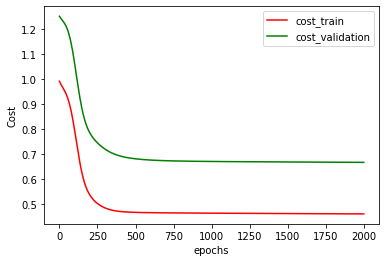

In [51]:
costs = np.squeeze(costs)
plt.plot(costs, color='red')
plt.plot(costs_dev, color='green')

plt.ylabel('Cost')
plt.xlabel('epochs')
plt.legend(['cost_train', 'cost_validation']);

<font size=5 color='blue'>

Precision

<font size=4>

Para calcular la precision del modelo se usa MSE:

$$100-MSE*100$$

es decir

$$100-(\dfrac{1}{m}\Sigma_{i}(y_{i}-a_{i})^2)*100$$

In [52]:
predictions_train = predict(opt_parameters, x_train, y_train)

print("train accuracy: {} %".format(100 - np.mean(np.power(predictions_train-y_train, 2)) * 100))

train accuracy: 51.80655365345294 %


In [53]:
predictions_test = predict(opt_parameters, x_test, y_test)
print("test accuracy: {} %".format(100 - np.mean(np.power(predictions_test-y_test, 2)) * 100))

test accuracy: 53.819617914692905 %
